In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

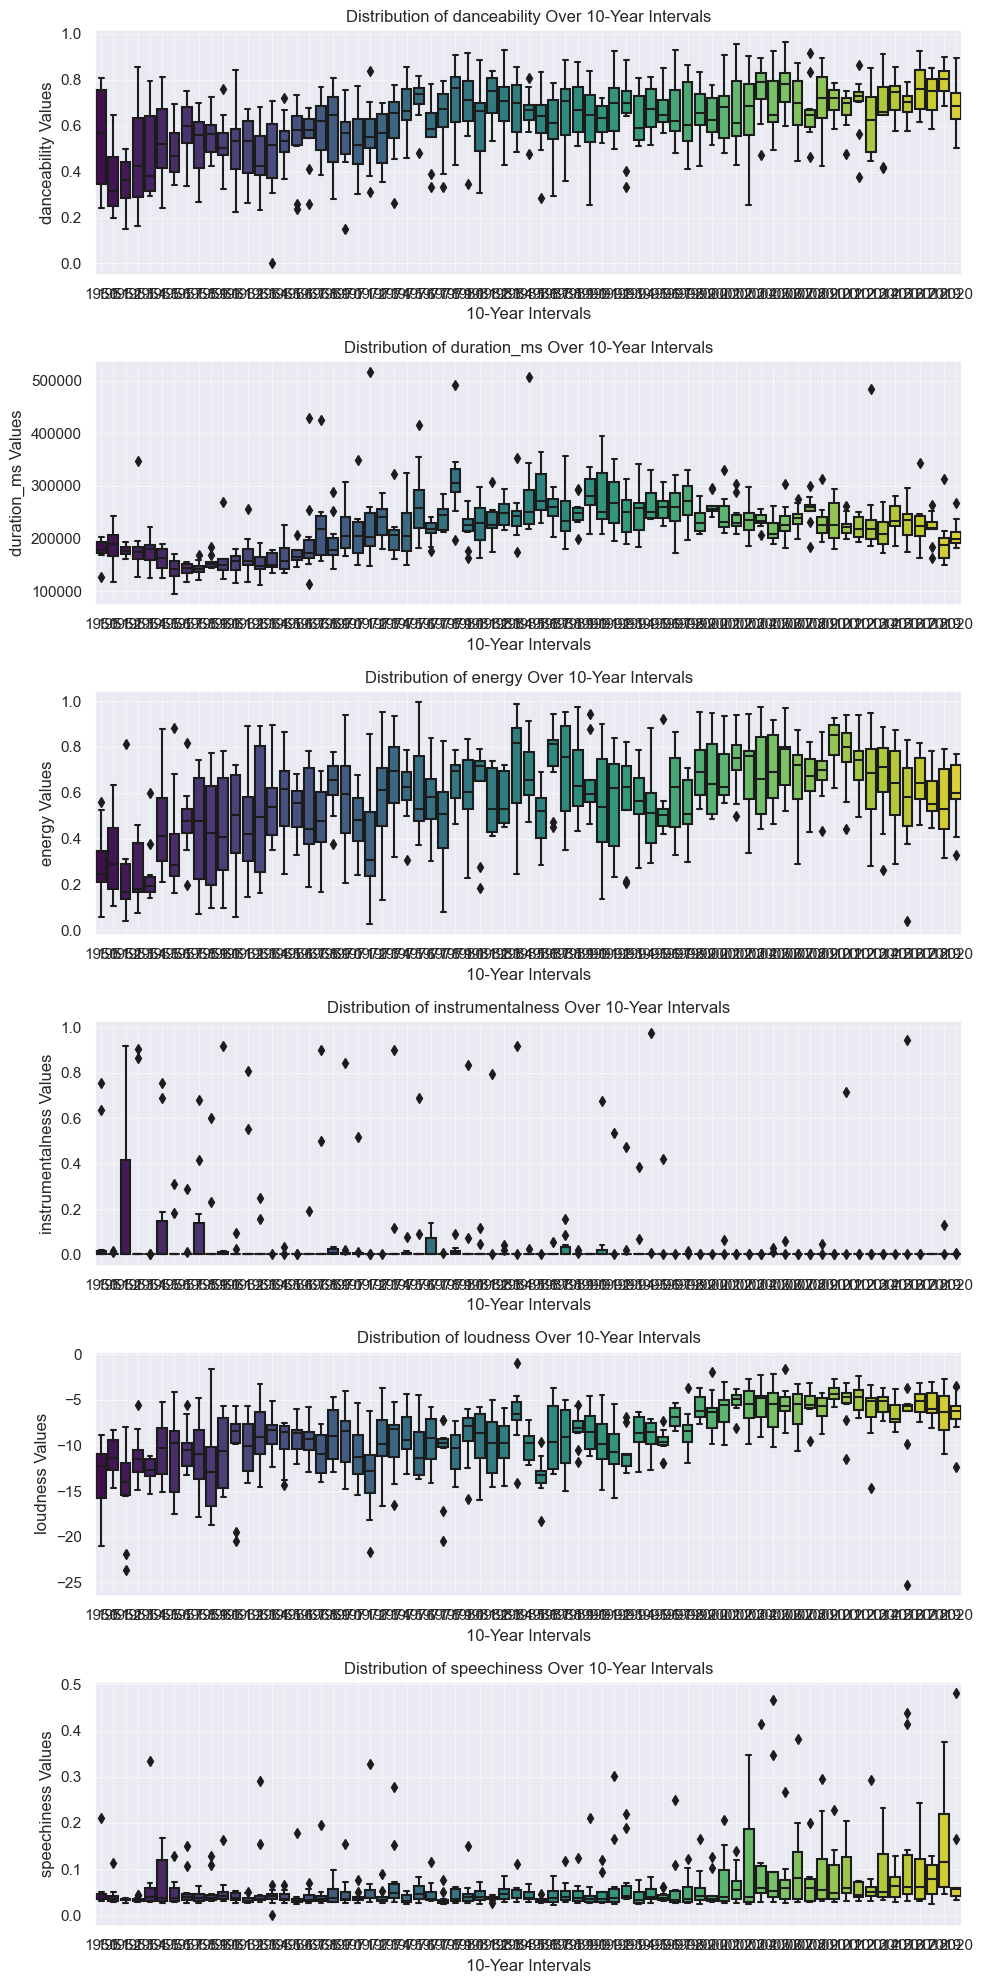

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('newBillboard_data_analysis.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:11]  # Adjust the column index based on your dataset
df = df[['Year'] + list(features)]

# Convert 'Year' to a period for easier grouping by decade
df['Year'] = df['Year'].dt.to_period('20Y')

# Create the plot
fig, axs = plt.subplots(len(features), 1, figsize=(10, 20))  # Adjust subplot layout for a single column of plots
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axs):
    feature = features[i]
    sns.boxplot(data=df, x='Year', y=feature, ax=ax, palette='viridis')
    ax.set_title(f'Distribution of {feature} Over 10-Year Intervals')
    ax.set_xlabel('10-Year Intervals')
    ax.set_ylabel(f'{feature} Values')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save the figure
fig.savefig('box_plot_output.png')  # Saves the plot as a PNG file


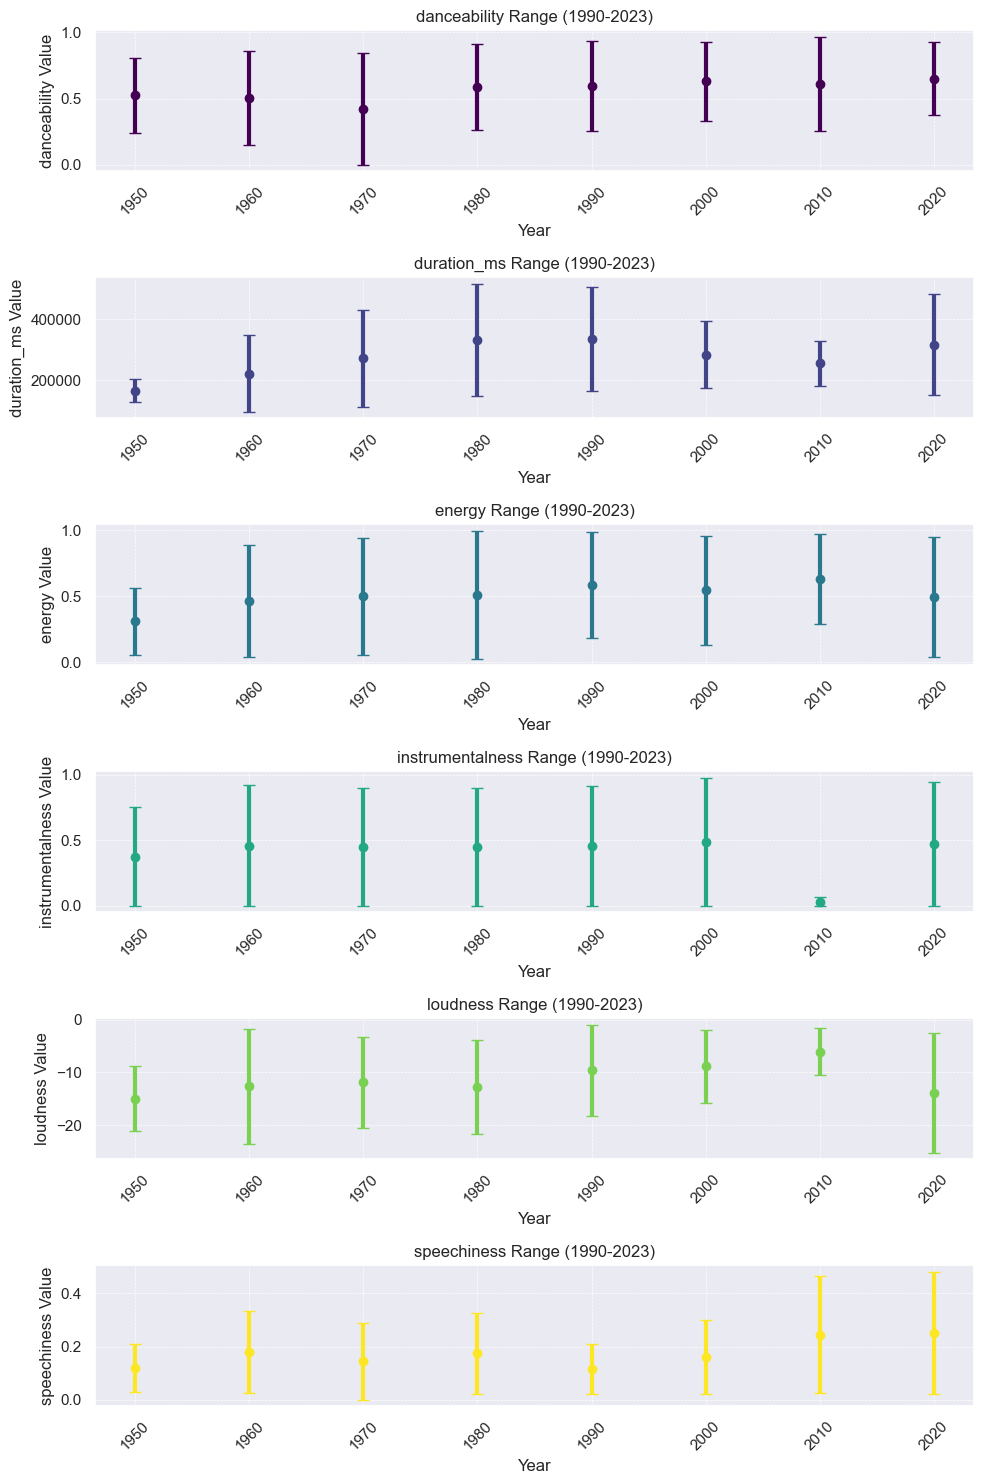

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('newBillboard_data_analysis.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:13]  # Adjust the column index based on your dataset
df = df[['Year'] + list(features)]

# Group data by 11-year intervals, compute min and max for each feature
df_grouped = df.groupby(pd.Grouper(key='Year', freq='10Y')).agg(['min', 'max'])

# Create the plot
fig, axs = plt.subplots(len(features), 1, figsize=(10, 15))  # Adjust subplot layout for a single column of plots
fig.subplots_adjust(hspace=0.5, wspace=0.3)

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

for i, ax in enumerate(axs):
    feature = features[i]
    # Get min and max data for plotting
    min_values = df_grouped[feature, 'min']
    max_values = df_grouped[feature, 'max']
    years = df_grouped.index.year

    # Plot the range between min and max using error bars
    ax.errorbar(years, (max_values + min_values) / 2, yerr=[(max_values - min_values) / 2, (max_values - min_values) / 2],
                fmt='o', color=colors[i], ecolor=colors[i], elinewidth=3, capsize=4)
    ax.set_title(f'{feature} Range (1990-2023)')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{feature} Value')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save the figure
fig.savefig('range_plot_output.png')  # Saves the plot as a PNG file


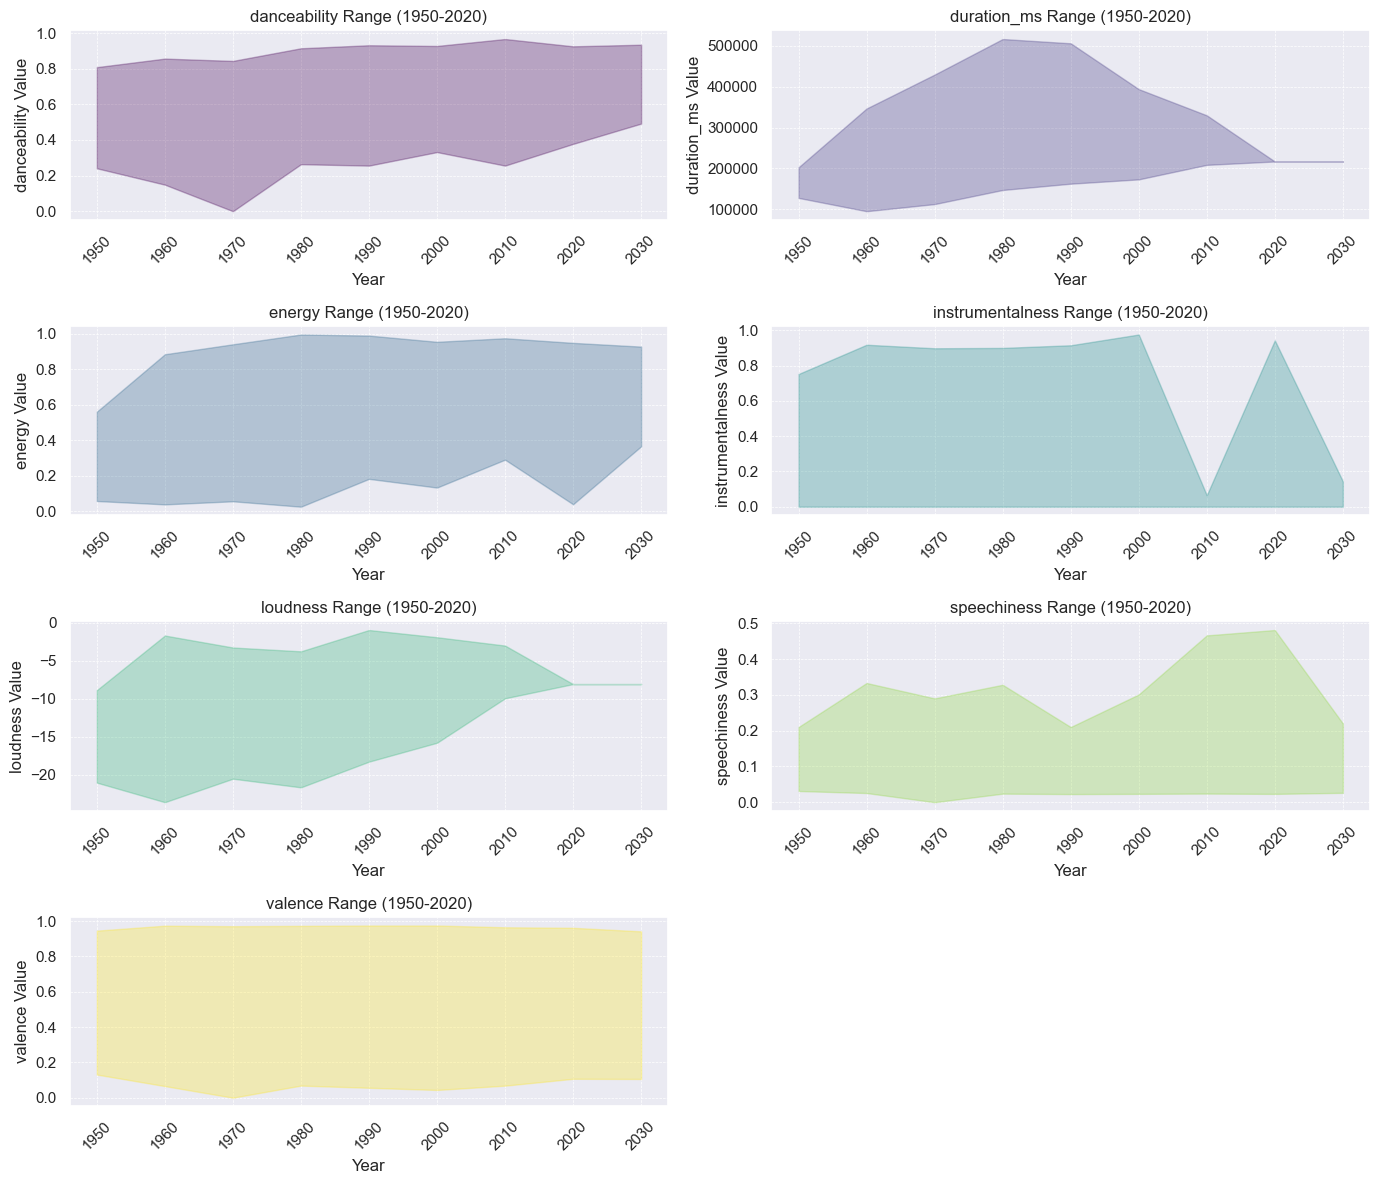

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('newBillboard_data_g.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:12]  # Adjust the column index based on your dataset
df = df[['Year'] + list(features)]

# Group data by 11-year intervals, compute min and max for each feature
df_grouped = df.groupby(pd.Grouper(key='Year', freq='10Y')).agg(['min', 'max'])

# Create the plot
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

for i, ax in enumerate(axs.flat):
    if i < len(features):
        feature = features[i]
        # Get min and max data for plotting
        min_values = df_grouped[feature, 'min']
        max_values = df_grouped[feature, 'max']

        # Plotting the average value could be added if needed
        # ax.plot(df_grouped.index.year, df_grouped[feature, 'mean'], marker='o', linestyle='-', color=colors[i])

        # Plot the range between min and max
        ax.fill_between(df_grouped.index.year, min_values, max_values, color=colors[i], alpha=0.3)
        ax.set_title(f'{feature} Range (1950-2020)')
        ax.set_xlabel('Year')
        ax.set_ylabel(f'{feature} Value')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='x', rotation=45)

# Hide unused subplots
for ax in axs.flat[len(features):]:
    ax.axis('off')

plt.tight_layout()

# Save the figure
fig.savefig('plot_output.png')  # Saves the plot as a PNG file


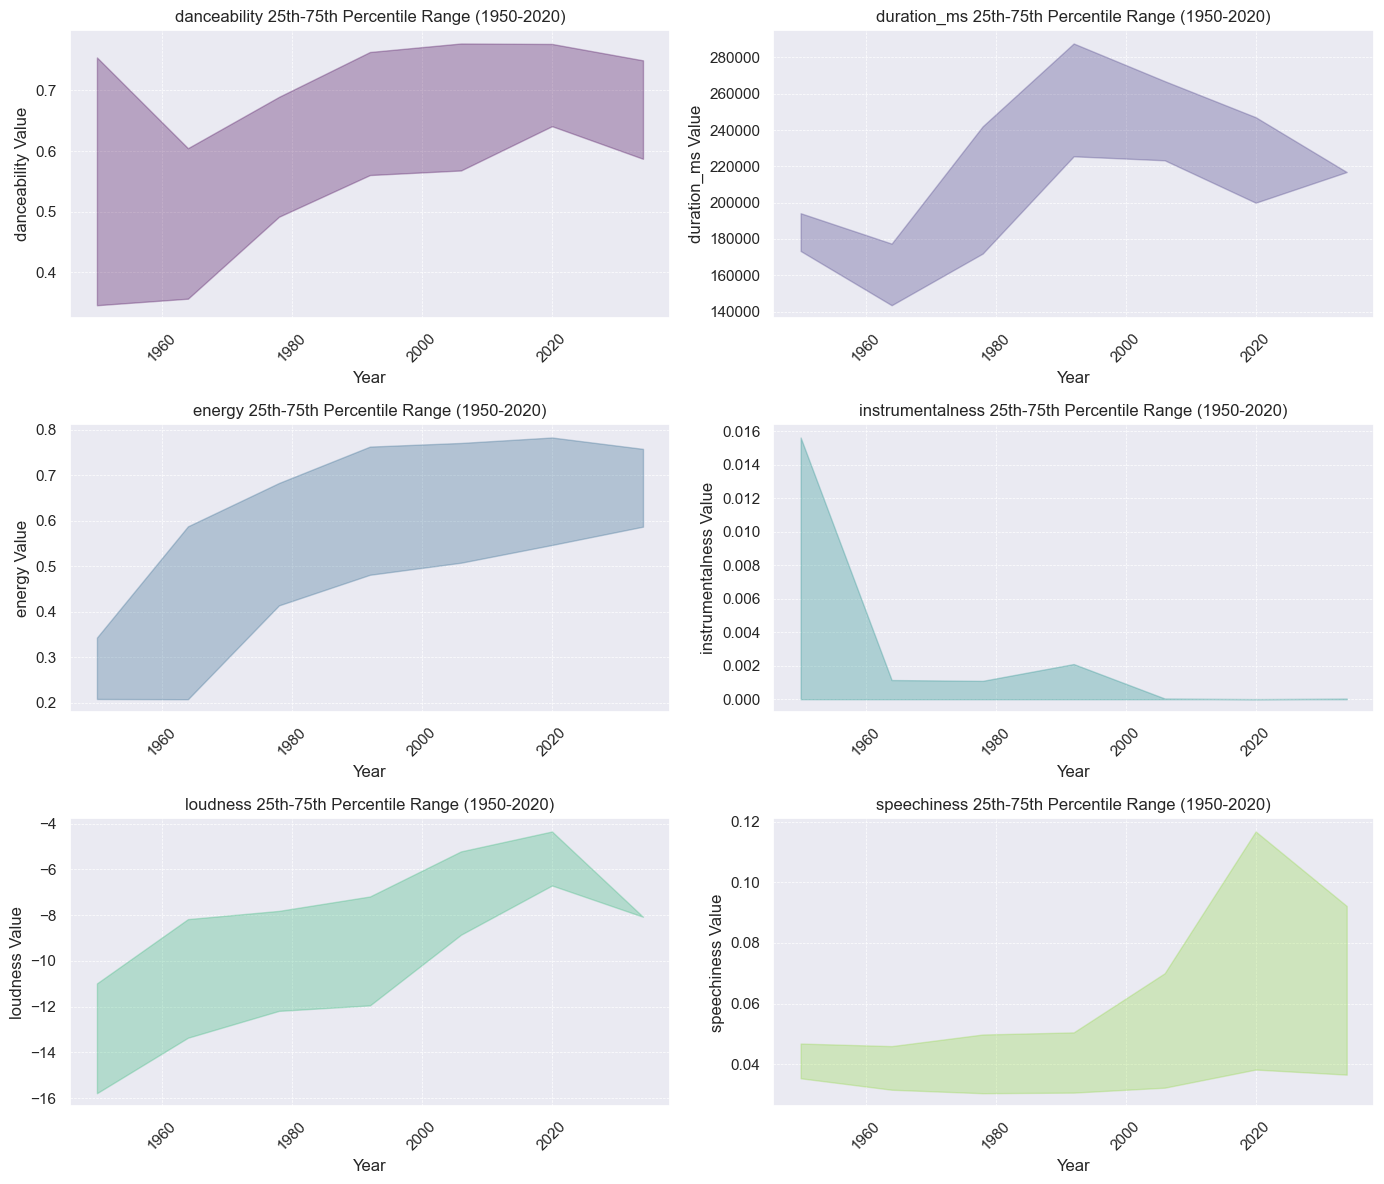

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('newBillboard_data_g.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:12]  # Adjust the column index based on your dataset
df = df[['Year'] + list(features)]

# Group data by 10-year intervals, compute 25th and 75th percentiles for each feature
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

df_grouped = df.groupby(pd.Grouper(key='Year', freq='14Y')).agg([q25, q75])

# Create the plot
fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # Adjust the subplot layout to match the number of features
fig.subplots_adjust(hspace=0.5, wspace=0.3)

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

for i, ax in enumerate(axs.flat):
    if i < len(features):
        feature = features[i]
        # Get 25th and 75th percentile data for plotting
        percentile_25th = df_grouped[feature, 'q25']
        percentile_75th = df_grouped[feature, 'q75']

        # Plot the range between 25th and 75th percentiles
        ax.fill_between(df_grouped.index.year, percentile_25th, percentile_75th, color=colors[i], alpha=0.3)
        ax.set_title(f'{feature} 25th-75th Percentile Range (1950-2020)')
        ax.set_xlabel('Year')
        ax.set_ylabel(f'{feature} Value')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='x', rotation=45)

# Hide unused subplots if any
for ax in axs.flat[len(features):]:
    ax.axis('off')

plt.tight_layout()

# Save the figure
fig.savefig('percentile_range_plot_output.png')  # Saves the plot as a PNG file


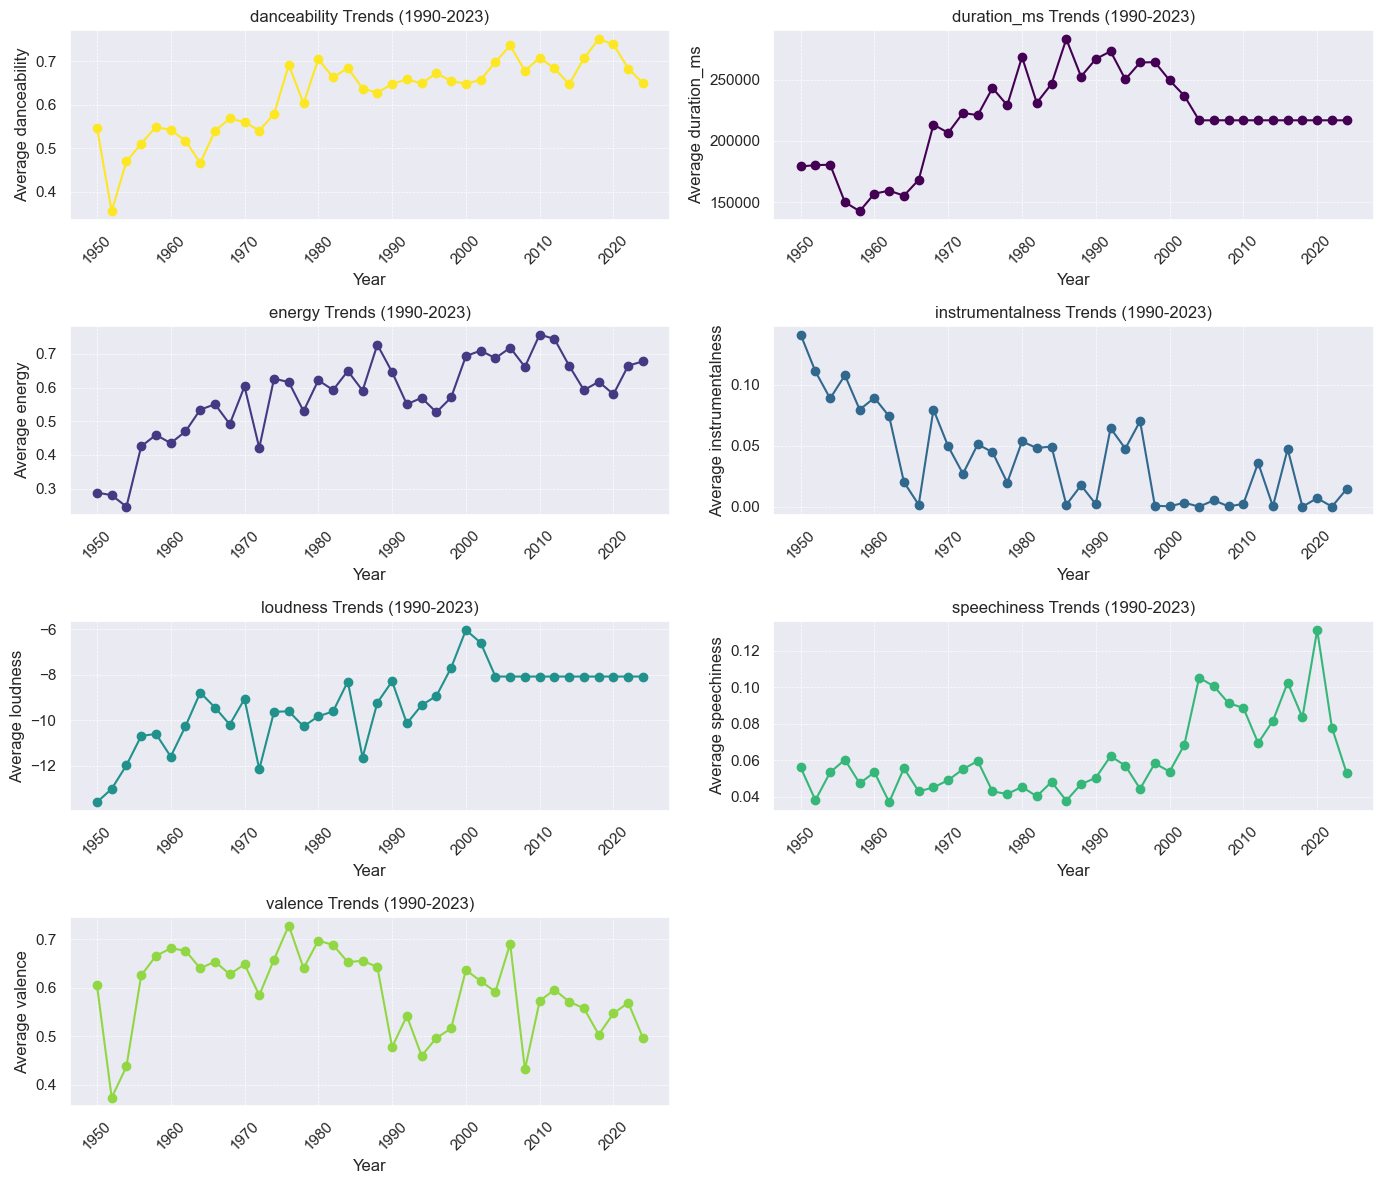

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('newBillboard_data_g.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:12]
df = df[['Year'] + list(features)]
df_grouped = df.groupby(pd.Grouper(key='Year', freq='2Y')).mean()

# Create the plot
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

for i, ax in enumerate(axs.flat):
    if i < len(features):
        feature = features[i]
        ax.plot(df_grouped.index.year, df_grouped[feature], marker='o', linestyle='-', color=colors[i-1])
        ax.set_title(f'{feature} Trends (1990-2023)')
        ax.set_xlabel('Year')
        ax.set_ylabel(f'Average {feature}')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='x', rotation=45)

for ax in axs.flat[len(features):]:
    ax.axis('off')

plt.tight_layout()

# Save the figure
fig.savefig('plot_output.png')  # Saves the plot as a PNG file


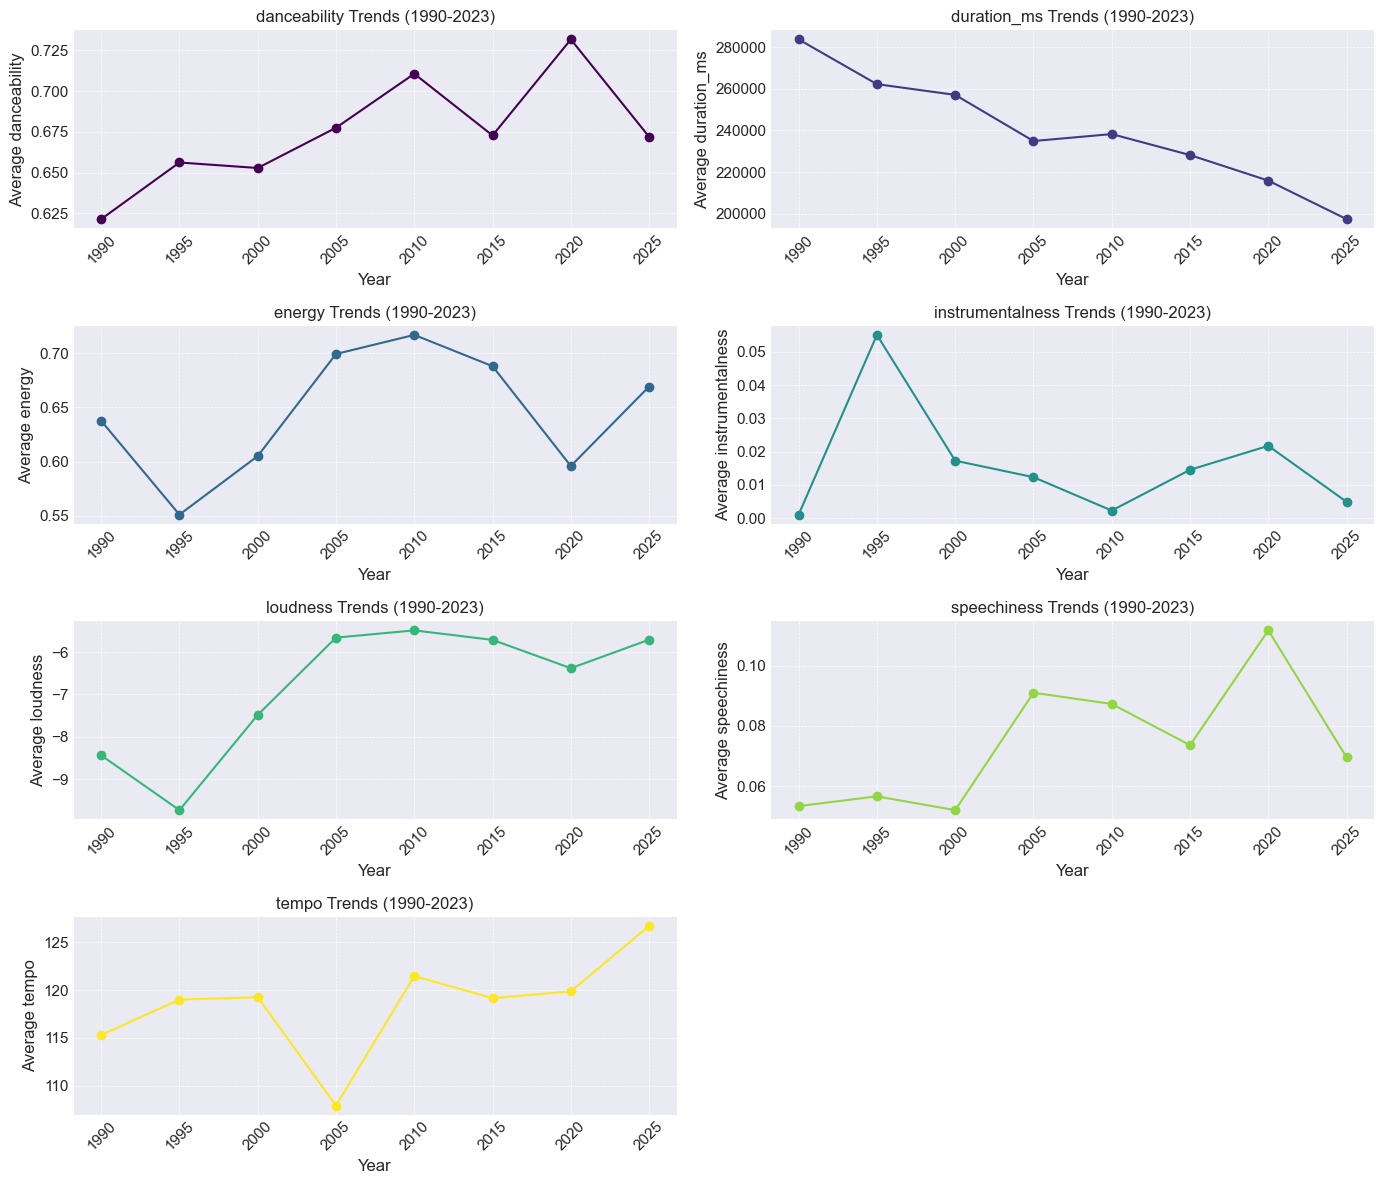

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file containing danceability values
df = pd.read_csv('data_analysis.csv')

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Select only the 1st (Year) column and the remaining 7 features
features = df.columns[6:13]  # Exclude the 'Year' column
df = df[['Year'] + list(features)]

# Group feature values into 5-year intervals and calculate the average
df_grouped = df.groupby(pd.Grouper(key='Year', freq='5Y')).mean()

# Use a predefined style sheet for aesthetic improvement
plt.style.use('seaborn-v0_8-darkgrid')

# Plot all features
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

colors = plt.cm.viridis(np.linspace(0, 1, len(features)))  # Create a color palette

for i, ax in enumerate(axs.flat):
    if i < len(features):
        feature = features[i]
        ax.plot(df_grouped.index.year, df_grouped[feature], marker='o', linestyle='-', color=colors[i])
        ax.set_title(f'{feature} Trends (1990-2023)')
        ax.set_xlabel('Year')
        ax.set_ylabel(f'Average {feature}')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.tick_params(axis='x', rotation=45)

# Hide empty subplots
for ax in axs.flat[len(features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


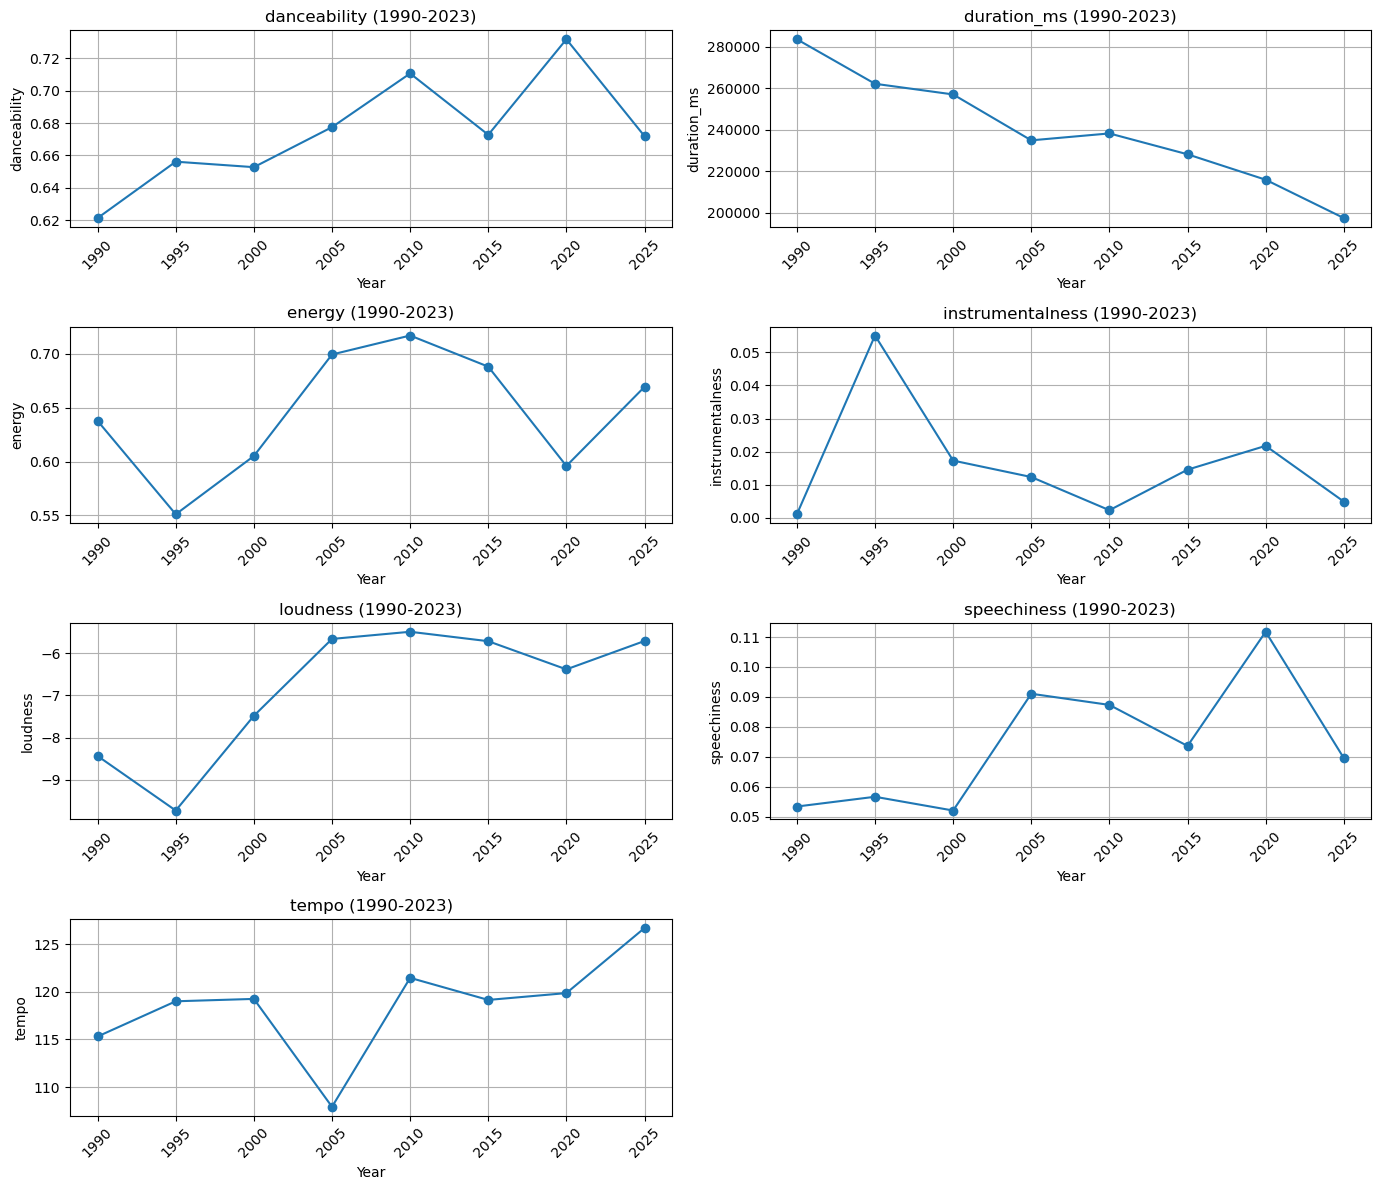

In [24]:
# Read the CSV file containing danceability values
df = pd.read_csv('data_analysis.csv')

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Select only the 1st (Year) column and the remaining 7 features
features = df.columns[6:13]  # Exclude the 'Year' column
df = df[['Year'] + list(features)]

# Group feature values into 5-year intervals and calculate the average
df_grouped = df.groupby(pd.Grouper(key='Year', freq='5Y')).mean()

# Plot all features
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, ax in enumerate(axs.flat):
    if i < len(features):
        feature = features[i]
        ax.plot(df_grouped.index.year, df_grouped[feature], marker='o', linestyle='-')
        ax.set_title(f'{feature} (1990-2023)')
        ax.set_xlabel('Year')
        ax.set_ylabel(feature)
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

# Hide empty subplots
for ax in axs.flat[len(features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


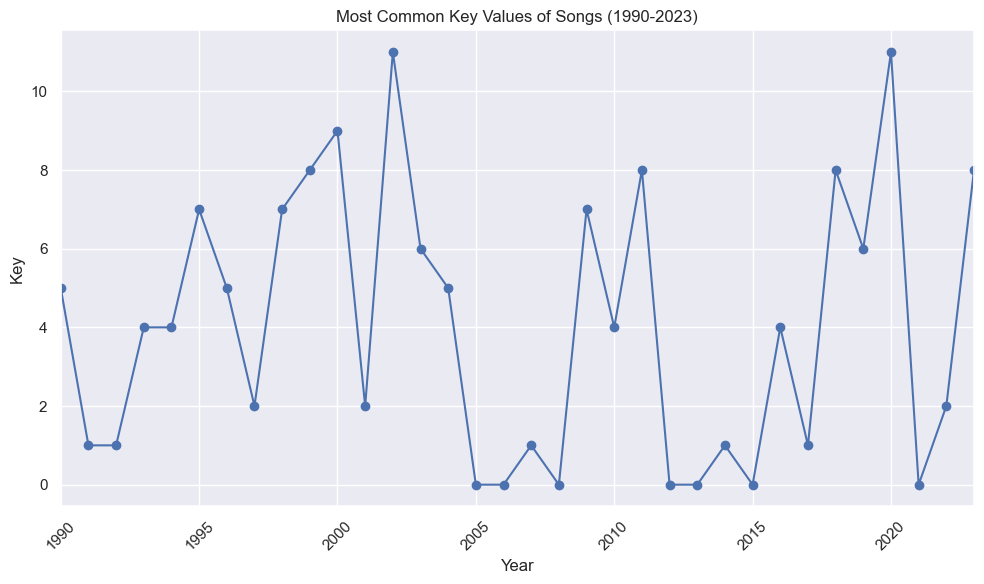

In [43]:
# Read the CSV file containing song data
df = pd.read_csv('data_analysis.csv')

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group data into 5-year intervals and count occurrences of each key value
df_grouped = df.groupby(pd.Grouper(key='Year', freq='1Y'))['key'].apply(lambda x: x.value_counts().idxmax())

# Plot the results
plt.figure(figsize=(10, 6))
df_grouped.plot(marker='o', linestyle='-')
plt.title('Most Common Key Values of Songs (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Key')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

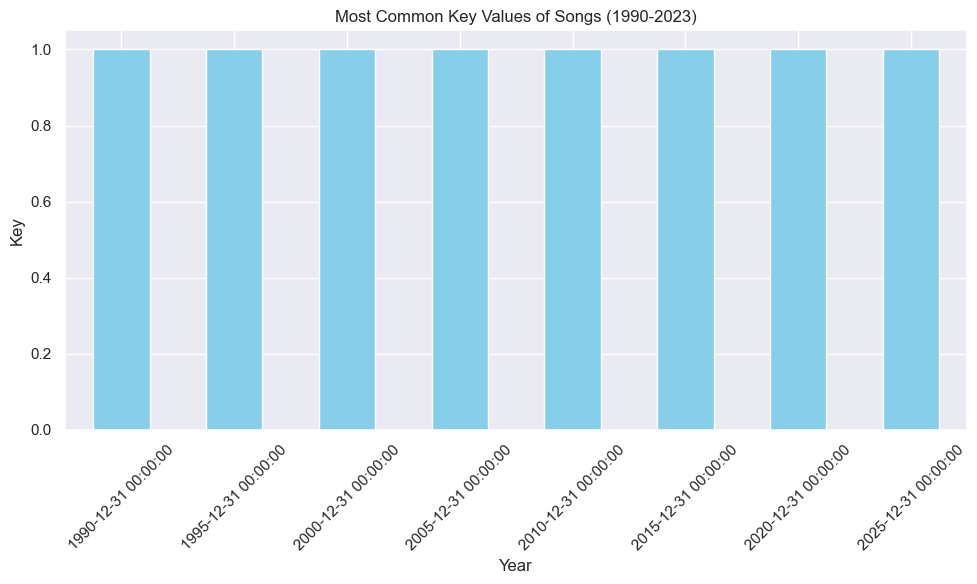

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file containing song data
df = pd.read_csv('data_analysis.csv')

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

# Group data into 3-year intervals and count occurrences of each key value
# This will group and find the most frequent key in each period
df_grouped = df.groupby(pd.Grouper(key='Year', freq='5Y'))['mode'].agg(lambda x: x.value_counts().idxmax())

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', color='skyblue')  # You can choose any color you like
plt.title('Most Common Key Values of Songs (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Key')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


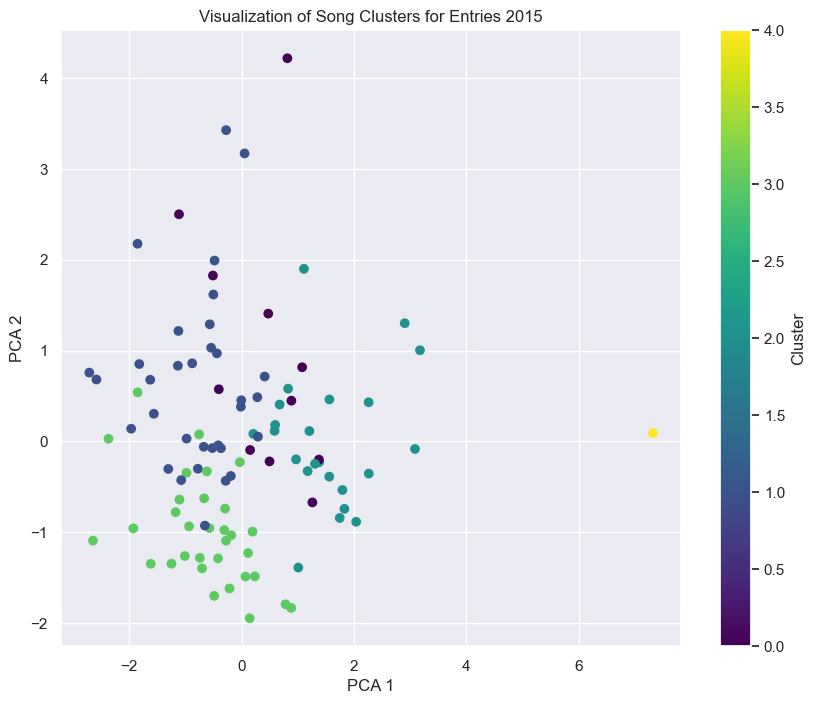

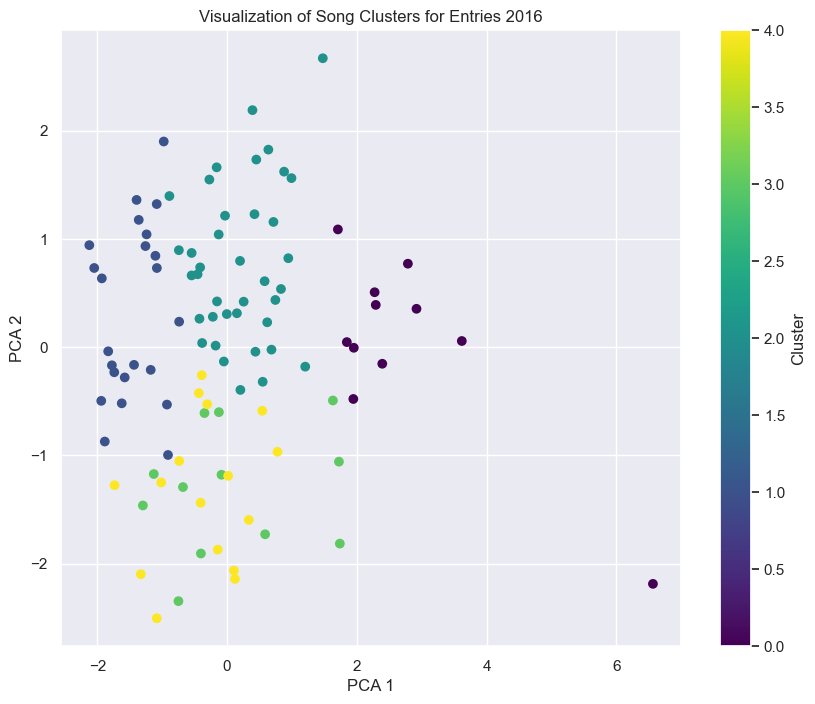

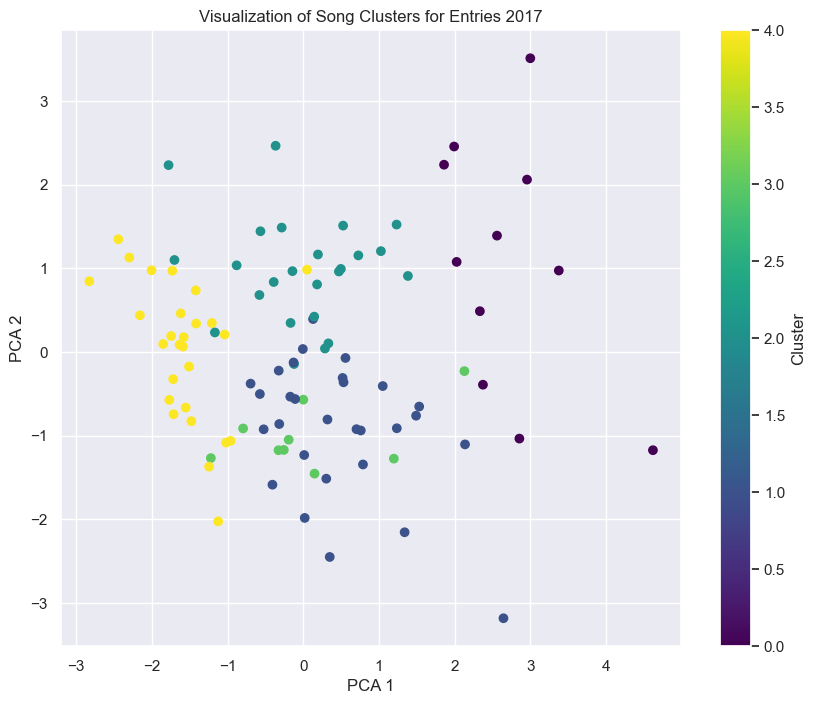

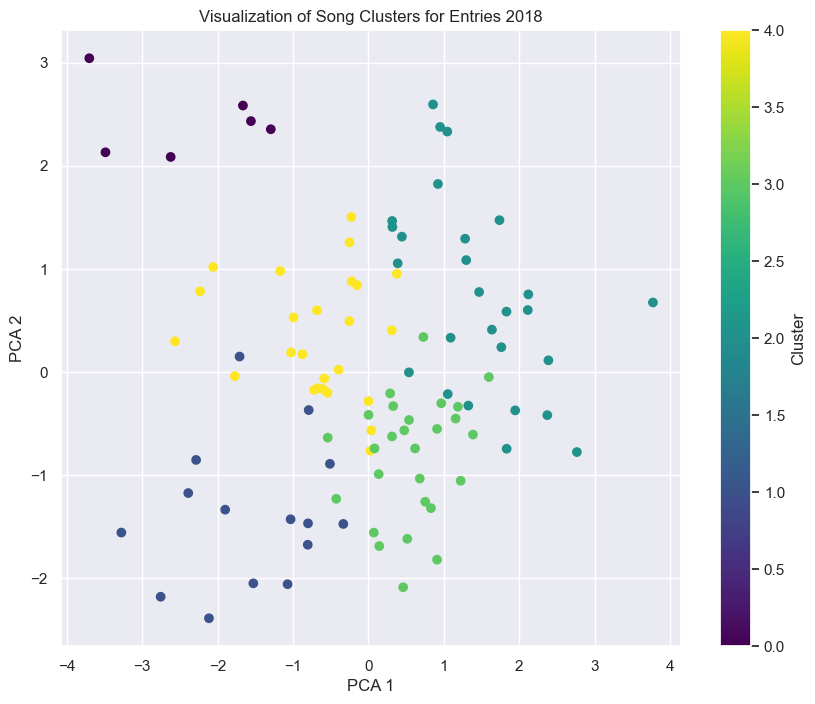

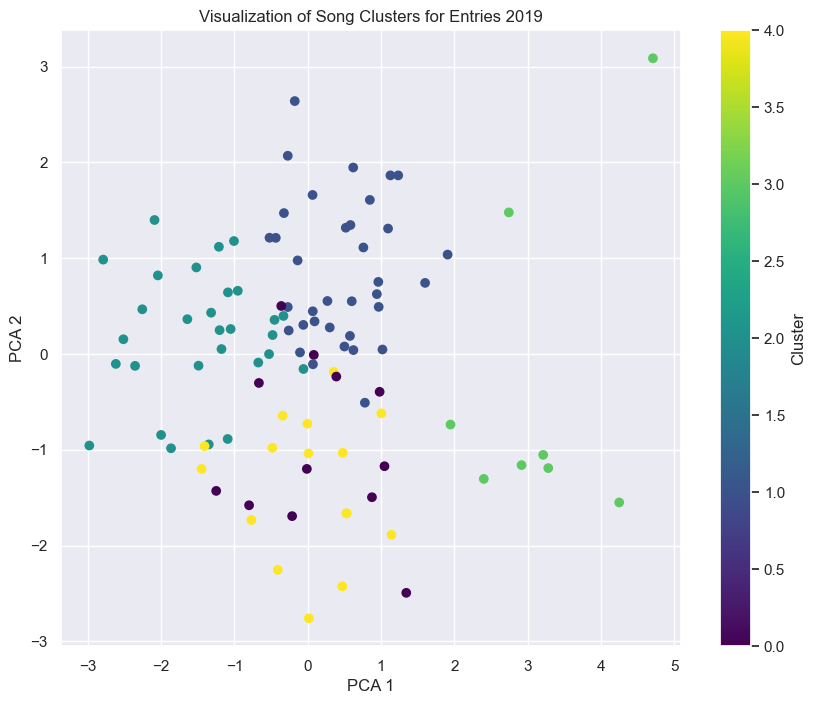

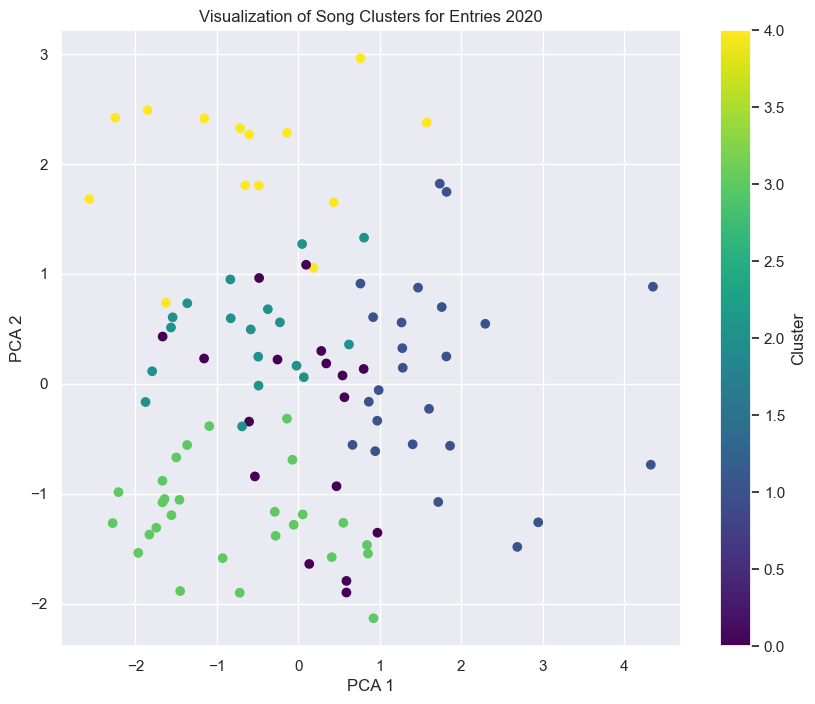

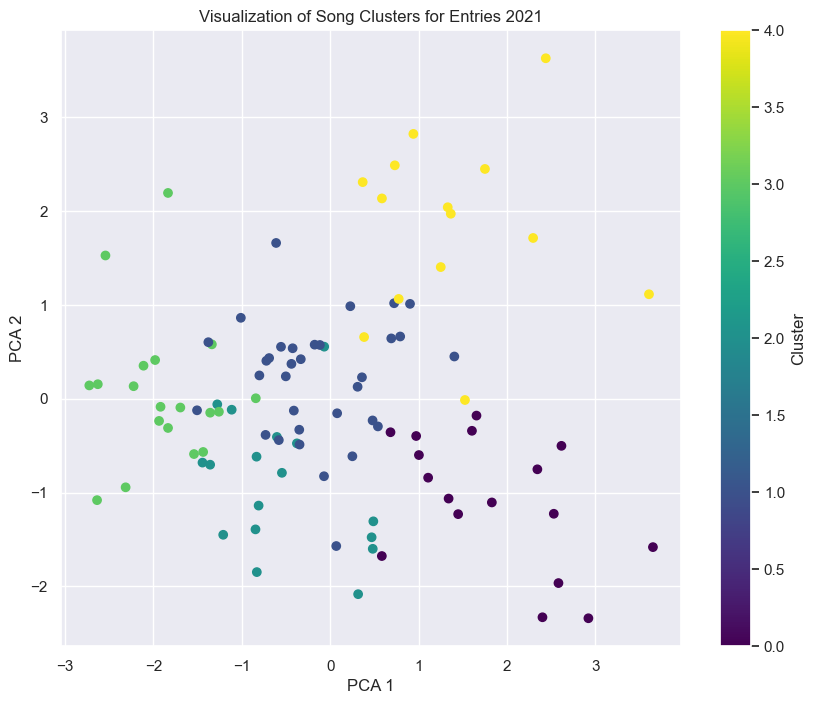

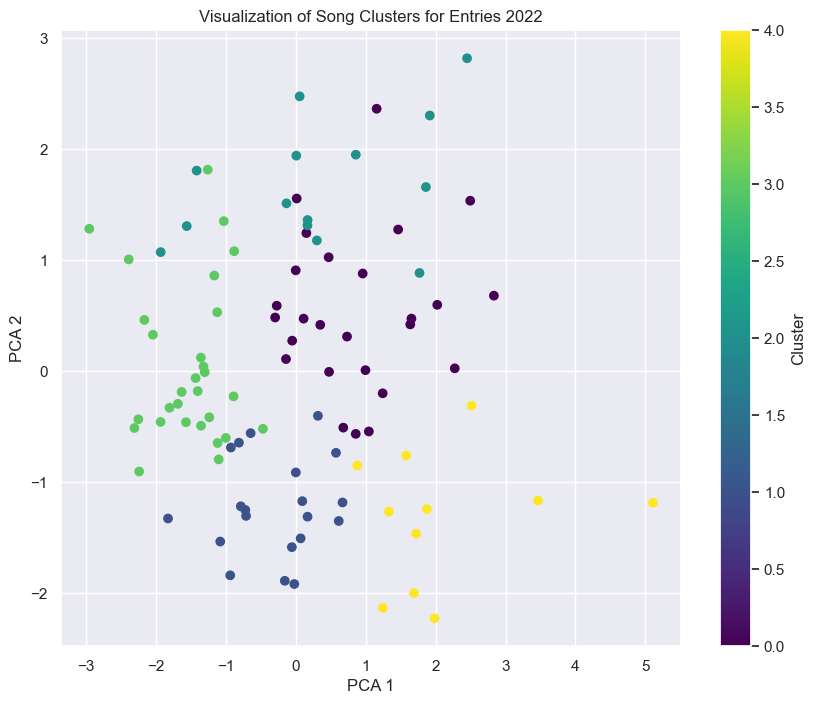

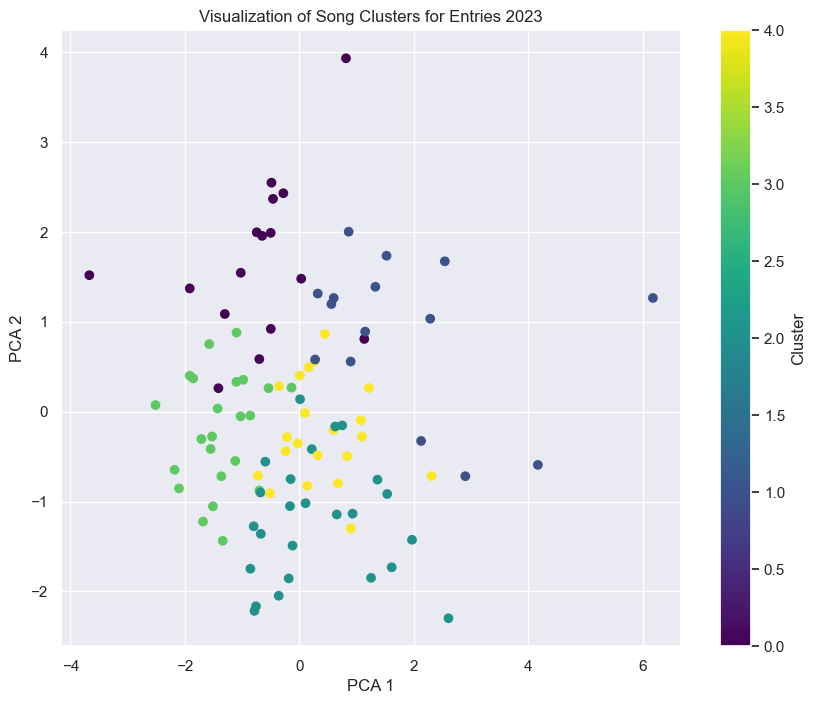

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('r3_final_data.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:11]  # Adjust the column index based on your dataset
df = df[['Year'] + list(features)]

# Prepare data for clustering
df_features = df[list(features)].dropna()  # Drop any NaN values which might affect clustering

# Define the number of clusters
n_clusters = 5

# Standardizing the features as k-means is sensitive to the scale of the data
scaler = StandardScaler()

# Split the dataframe into chunks of 100 entries
num_entries = 100
for start in range(0, df_features.shape[0], num_entries):
    count = 1
    end = start + num_entries
    subset = df_features.iloc[start:end].copy()  # Make a copy to avoid SettingWithCopyWarning

    if not subset.empty:
        df_features_scaled = scaler.fit_transform(subset)  # Fit and transform the scaler on the subset

        # Apply k-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(df_features_scaled)
        subset.loc[:, 'Cluster'] = kmeans.labels_  # Use .loc to avoid SettingWithCopyWarning

        # Use PCA to reduce dimensions to 2D for visualization purposes
        pca = PCA(2)
        projected = pca.fit_transform(df_features_scaled)

        # Visualizing the clusters
        plt.figure(figsize=(10, 8))
        plt.scatter(projected[:, 0], projected[:, 1], c=subset['Cluster'], cmap='viridis', marker='o')
        plt.title(f'Visualization of Song Clusters for Entries {int(end / 100 + 2014)}')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()
    

# Optionally, save the entire DataFrame with cluster labels for each subset (need to modify to keep track of all changes)
# df.to_csv('clustered_data.csv', index=False)


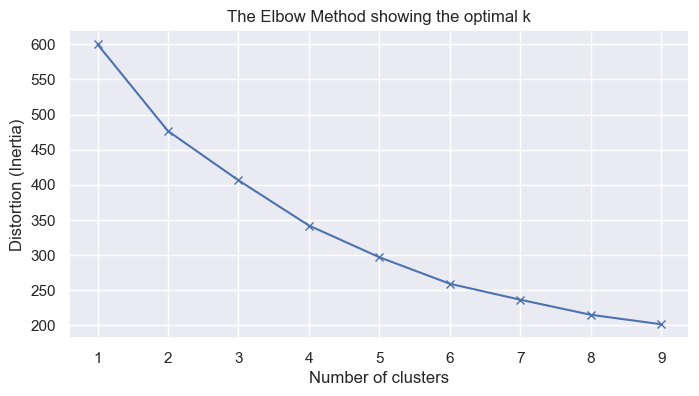

KeyboardInterrupt: Interrupted by user

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('r3_final_data.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:12]  # Adjust the column index based on your dataset
df = df[['Year'] + list(features)]

# Prepare data for clustering
df_features = df[list(features)].dropna()  # Drop any NaN values which might affect clustering

# Standardizing the features as k-means is sensitive to the scale of the data
scaler = StandardScaler()

# Split the dataframe into chunks of 10 entries
num_entries = 100
for start in range(0, df_features.shape[0], num_entries):
    end = start + num_entries
    indices = df_features.iloc[start:end].index  # Get actual indices of the rows

    if not df_features.loc[indices].empty:
        df_features_scaled = scaler.fit_transform(df_features.loc[indices])  # Fit and transform the scaler on the subset

        # Determine the optimal number of clusters using the elbow method
        distortions = []
        K = range(1, min(len(df_features.loc[indices]), 10))  # Check for up to 10 clusters or number of samples, whichever is smaller
        for k in K:
            kmeanModel = KMeans(n_clusters=k, n_init=10)
            kmeanModel.fit(df_features_scaled)
            distortions.append(kmeanModel.inertia_)

        plt.figure(figsize=(8, 4))
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion (Inertia)')
        plt.title('The Elbow Method showing the optimal k')
        plt.grid(True)
        plt.show()

        # Optionally, you can then run k-means with the chosen number of clusters
        optimal_k = int(input("Enter the optimal number of clusters: "))
        kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0).fit(df_features_scaled)
        df.loc[indices, 'Cluster'] = kmeans.labels_  # Assign cluster labels directly to the main dataframe

        # Use PCA to reduce dimensions to 2D for visualization purposes
        pca = PCA(2)
        projected = pca.fit_transform(df_features_scaled)

        # Visualizing the clusters
        plt.figure(figsize=(10, 8))
        plt.scatter(projected[:, 0], projected[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
        plt.title(f'Visualization of Song Clusters for Entries {start} to {end}')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

# Optionally, save the entire DataFrame with cluster labels for each subset (need to modify to keep track of all changes)
# df.to_csv('clustered_data.csv', index=False)


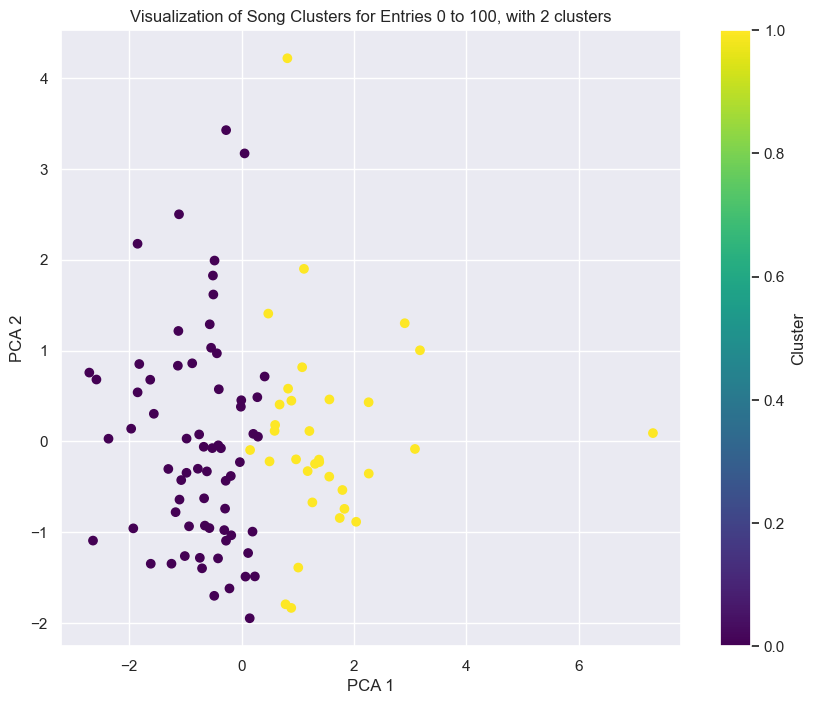

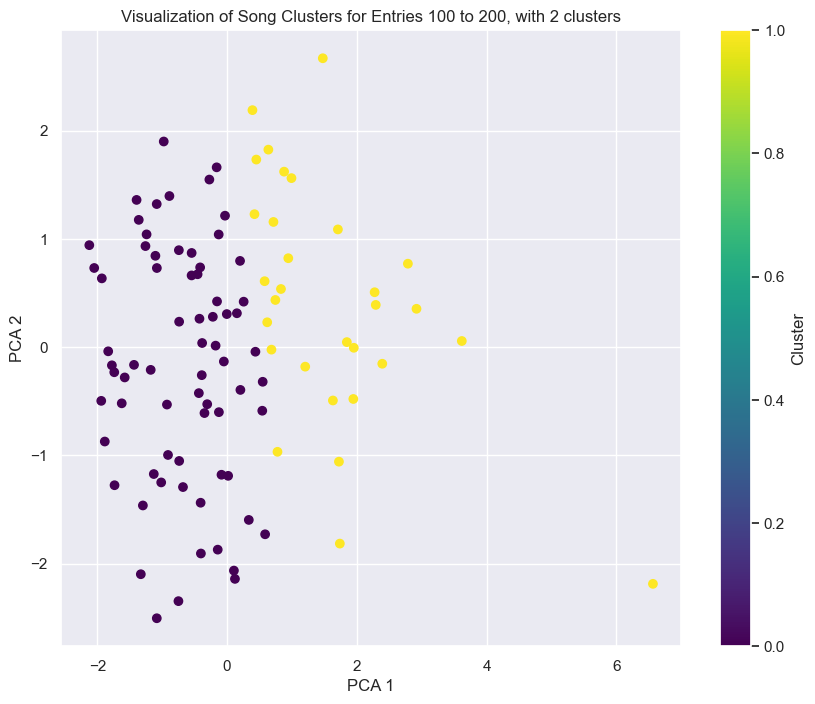

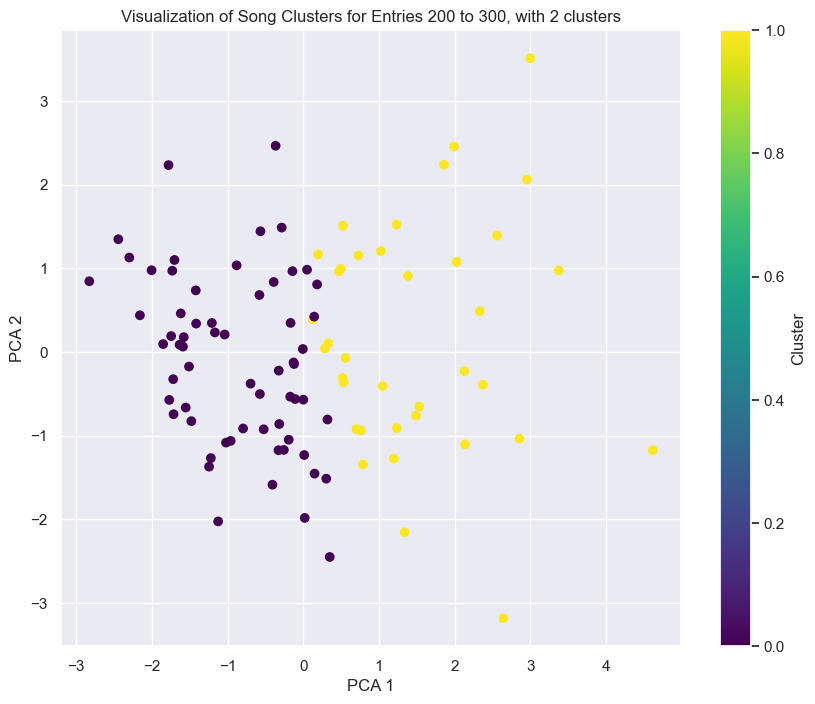

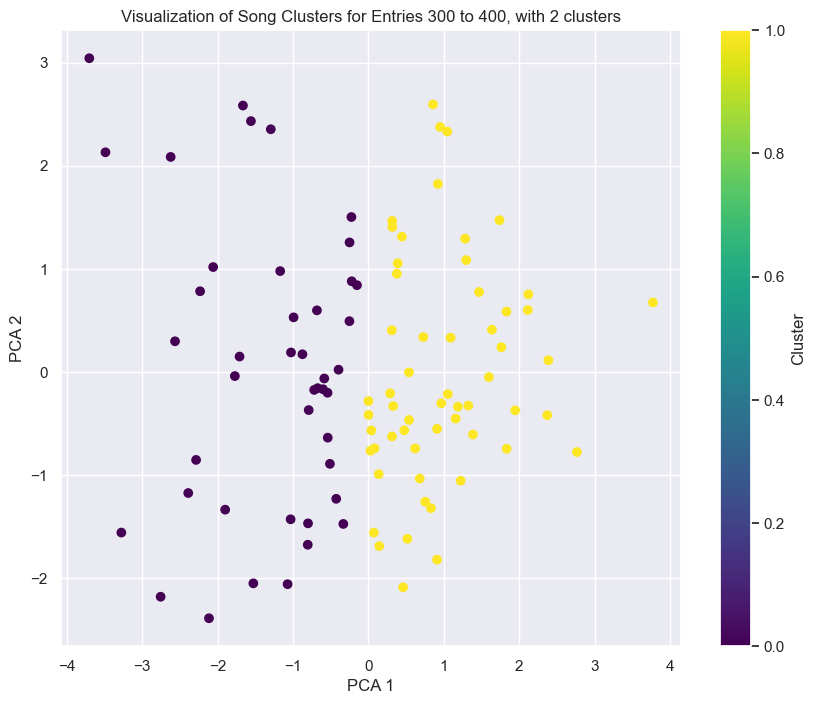

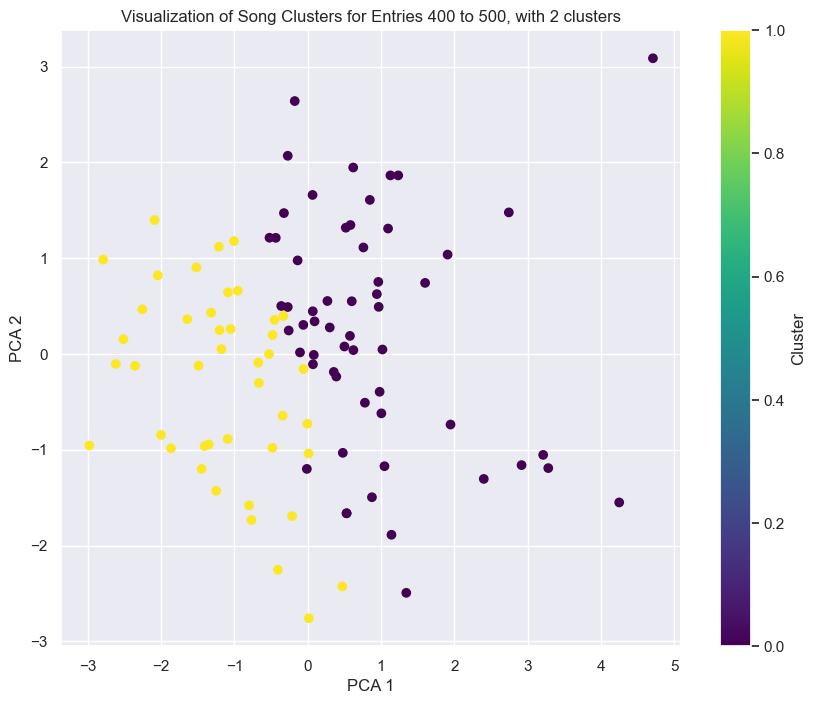

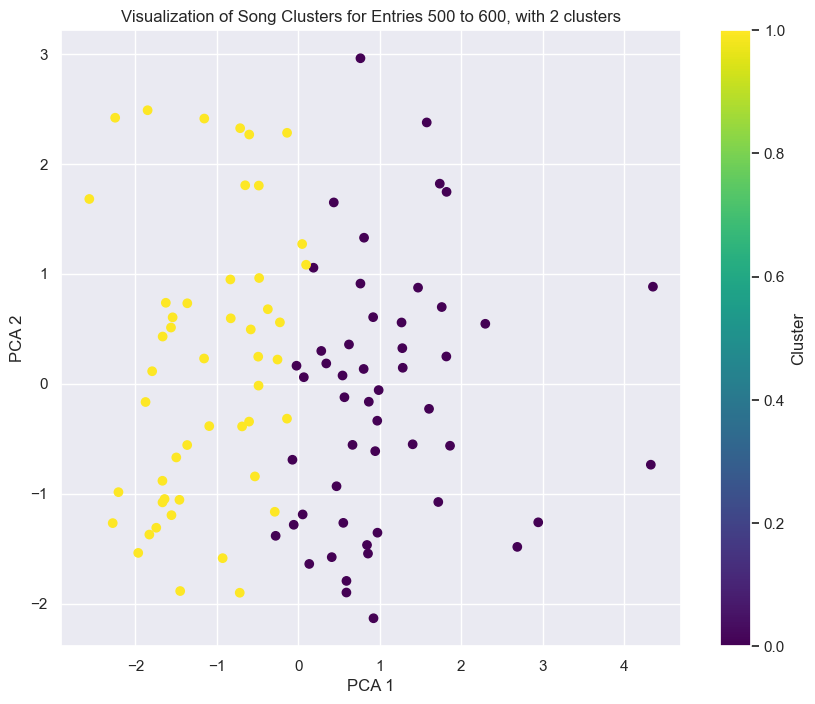

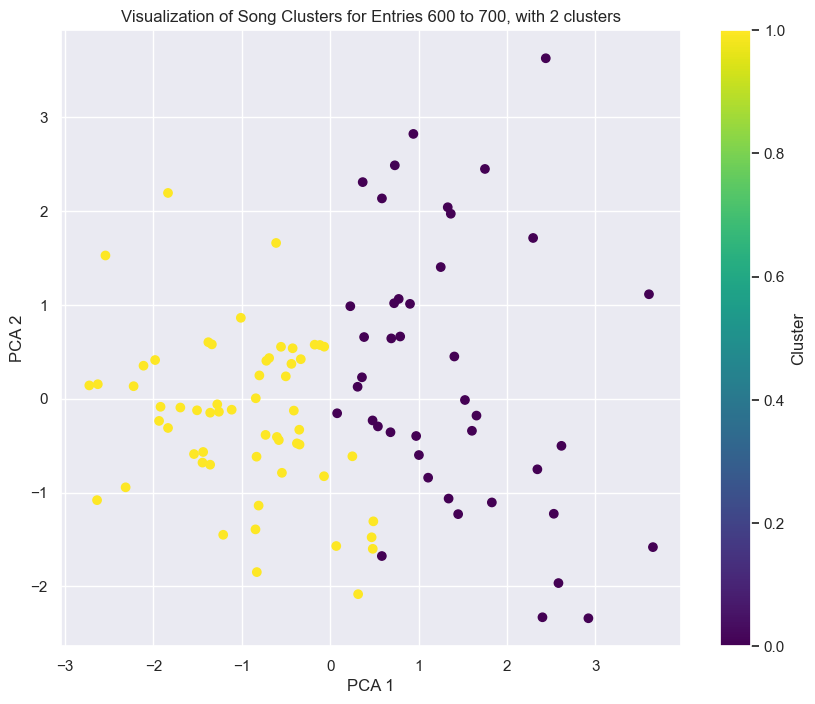

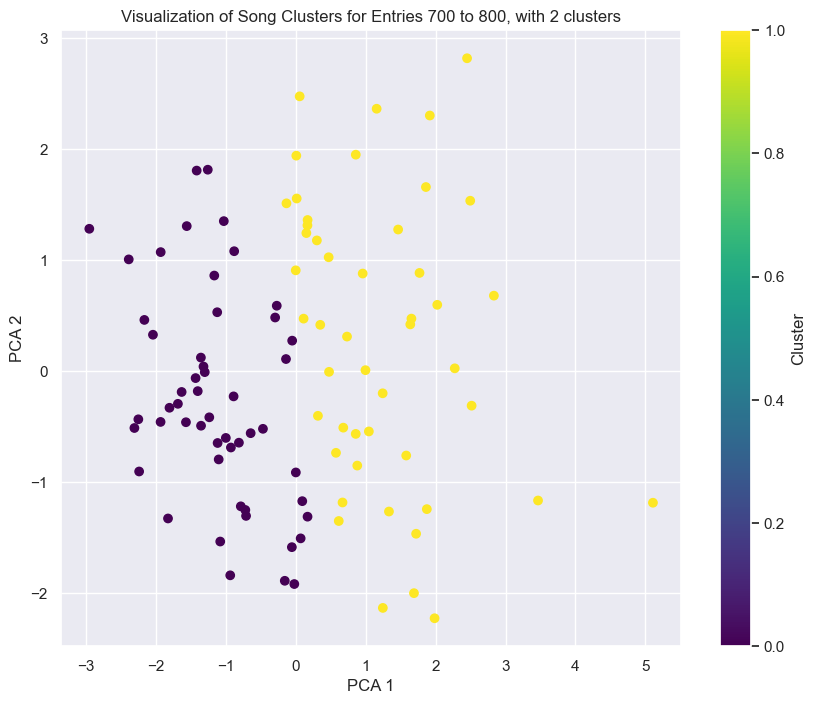

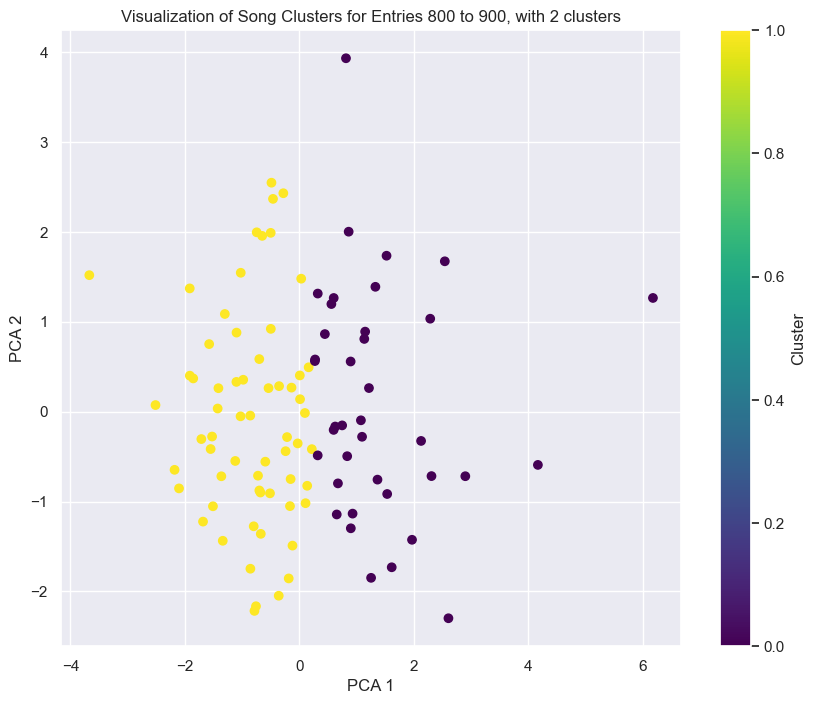

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Setting Seaborn style
sns.set_theme(style="darkgrid")

# Load and preprocess the data
df = pd.read_csv('r3_final_data.csv')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
features = df.columns[5:12]  # Adjust the column index based on your dataset
df = df[['Year'] + list(features)]

# Prepare data for clustering
df_features = df[list(features)].dropna()  # Drop any NaN values which might affect clustering

# Standardizing the features as k-means is sensitive to the scale of the data
scaler = StandardScaler()

# Split the dataframe into chunks of 100 entries
num_entries = 100
for start in range(0, df_features.shape[0], num_entries):
    end = start + num_entries
    indices = df_features.iloc[start:end].index  # Get actual indices of the rows

    if not df_features.loc[indices].empty:
        df_features_scaled = scaler.fit_transform(df_features.loc[indices])  # Fit and transform the scaler on the subset

        # Determine the optimal number of clusters using the elbow method
        distortions = []
        K = range(1, min(len(df_features.loc[indices]), 10))  # Check for up to 10 clusters or number of samples, whichever is smaller
        for k in K:
            kmeanModel = KMeans(n_clusters=k, n_init=10)
            kmeanModel.fit(df_features_scaled)
            distortions.append(kmeanModel.inertia_)

        # Find the optimal k using the elbow method
        optimal_k = 1
        if len(distortions) > 1:
            differences = [distortions[i] - distortions[i + 1] for i in range(len(distortions) - 1)]
            optimal_k = differences.index(max(differences)) + 2  # Adding 2 to account for zero-based indexing and k=1

        # Run k-means with the chosen number of clusters
        kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0).fit(df_features_scaled)
        df.loc[indices, 'Cluster'] = kmeans.labels_  # Assign cluster labels directly to the main dataframe

        # Use PCA to reduce dimensions to 2D for visualization purposes
        pca = PCA(2)
        projected = pca.fit_transform(df_features_scaled)

        # Visualizing the clusters
        plt.figure(figsize=(10, 8))
        plt.scatter(projected[:, 0], projected[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
        plt.title(f'Visualization of Song Clusters for Entries {start} to {end}, with {optimal_k} clusters')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

# Optionally, save the entire DataFrame with cluster labels for each subset (need to modify to keep track of all changes)
# df.to_csv('clustered_data.csv', index=False)
